## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 64
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 0.9765322	total: 58.8ms	remaining: 58.7s
1:	learn: 0.9565462	total: 59.7ms	remaining: 29.8s
2:	learn: 0.9357308	total: 60.6ms	remaining: 20.2s
3:	learn: 0.9198577	total: 61.8ms	remaining: 15.4s
4:	learn: 0.9033065	total: 62.8ms	remaining: 12.5s
5:	learn: 0.8883829	total: 63.8ms	remaining: 10.6s
6:	learn: 0.8715638	total: 64.6ms	remaining: 9.17s
7:	learn: 0.8554015	total: 65.6ms	remaining: 8.14s
8:	learn: 0.8408243	total: 66.5ms	remaining: 7.33s
9:	learn: 0.8249523	total: 67.5ms	remaining: 6.68s
10:	learn: 0.8089899	total: 68.4ms	remaining: 6.15s
11:	learn: 0.7951525	total: 69.4ms	remaining: 5.71s
12:	learn: 0.7806923	total: 70.2ms	remaining: 5.33s
13:	learn: 0.7657122	total: 71ms	remaining: 5s
14:	learn: 0.7524234	total: 71.8ms	remaining: 4.71s
15:	learn: 0.7384946	total: 72.5ms	remaining: 4.46s
16:	learn: 0.7264773	total: 73.3ms	remaining: 4.24s
17:	learn: 0.7141569	total: 74.2ms	remaining: 4.05s
18:	learn: 0.7017025	total: 75ms	remaining: 3.87s

60:	learn: 0.4134119	total: 109ms	remaining: 1.68s
61:	learn: 0.4093601	total: 110ms	remaining: 1.66s
62:	learn: 0.4046635	total: 111ms	remaining: 1.65s
63:	learn: 0.4015940	total: 112ms	remaining: 1.63s
64:	learn: 0.3980440	total: 113ms	remaining: 1.62s
65:	learn: 0.3940105	total: 114ms	remaining: 1.61s
66:	learn: 0.3906811	total: 115ms	remaining: 1.6s
67:	learn: 0.3876145	total: 116ms	remaining: 1.59s
68:	learn: 0.3843849	total: 117ms	remaining: 1.57s
69:	learn: 0.3818634	total: 117ms	remaining: 1.56s
70:	learn: 0.3786909	total: 118ms	remaining: 1.54s
71:	learn: 0.3762043	total: 119ms	remaining: 1.53s
72:	learn: 0.3731209	total: 120ms	remaining: 1.52s
73:	learn: 0.3697429	total: 120ms	remaining: 1.51s
74:	learn: 0.3665362	total: 121ms	remaining: 1.5s
75:	learn: 0.3637738	total: 122ms	remaining: 1.48s
76:	learn: 0.3601275	total: 123ms	remaining: 1.47s
77:	learn: 0.3575933	total: 123ms	remaining: 1.46s
78:	learn: 0.3546215	total: 124ms	remaining: 1.45s
79:	learn: 0.3524164	total: 125ms

154:	learn: 0.2559736	total: 190ms	remaining: 1.03s
155:	learn: 0.2550990	total: 191ms	remaining: 1.03s
156:	learn: 0.2543620	total: 192ms	remaining: 1.03s
157:	learn: 0.2538133	total: 193ms	remaining: 1.03s
158:	learn: 0.2528299	total: 194ms	remaining: 1.03s
159:	learn: 0.2522945	total: 195ms	remaining: 1.02s
160:	learn: 0.2514636	total: 196ms	remaining: 1.02s
161:	learn: 0.2510339	total: 197ms	remaining: 1.02s
162:	learn: 0.2506744	total: 197ms	remaining: 1.01s
163:	learn: 0.2497473	total: 198ms	remaining: 1.01s
164:	learn: 0.2489919	total: 199ms	remaining: 1.01s
165:	learn: 0.2484893	total: 200ms	remaining: 1s
166:	learn: 0.2473906	total: 201ms	remaining: 1s
167:	learn: 0.2469127	total: 202ms	remaining: 999ms
168:	learn: 0.2463427	total: 203ms	remaining: 997ms
169:	learn: 0.2456318	total: 203ms	remaining: 994ms
170:	learn: 0.2452612	total: 204ms	remaining: 990ms
171:	learn: 0.2443351	total: 205ms	remaining: 987ms
172:	learn: 0.2434401	total: 207ms	remaining: 987ms
173:	learn: 0.2430

284:	learn: 0.1896013	total: 299ms	remaining: 751ms
285:	learn: 0.1891919	total: 300ms	remaining: 749ms
286:	learn: 0.1885296	total: 301ms	remaining: 748ms
287:	learn: 0.1882646	total: 302ms	remaining: 746ms
288:	learn: 0.1880015	total: 303ms	remaining: 745ms
289:	learn: 0.1874925	total: 304ms	remaining: 743ms
290:	learn: 0.1870430	total: 304ms	remaining: 742ms
291:	learn: 0.1864708	total: 305ms	remaining: 740ms
292:	learn: 0.1861685	total: 306ms	remaining: 738ms
293:	learn: 0.1857722	total: 307ms	remaining: 736ms
294:	learn: 0.1853091	total: 308ms	remaining: 735ms
295:	learn: 0.1850667	total: 308ms	remaining: 734ms
296:	learn: 0.1847106	total: 309ms	remaining: 732ms
297:	learn: 0.1843967	total: 310ms	remaining: 730ms
298:	learn: 0.1840462	total: 311ms	remaining: 729ms
299:	learn: 0.1837717	total: 312ms	remaining: 727ms
300:	learn: 0.1833776	total: 312ms	remaining: 726ms
301:	learn: 0.1831978	total: 313ms	remaining: 724ms
302:	learn: 0.1828671	total: 314ms	remaining: 722ms
303:	learn: 

384:	learn: 0.1544869	total: 381ms	remaining: 609ms
385:	learn: 0.1543020	total: 382ms	remaining: 608ms
386:	learn: 0.1539459	total: 383ms	remaining: 607ms
387:	learn: 0.1535283	total: 384ms	remaining: 606ms
388:	learn: 0.1534651	total: 385ms	remaining: 604ms
389:	learn: 0.1530718	total: 386ms	remaining: 603ms
390:	learn: 0.1528602	total: 386ms	remaining: 602ms
391:	learn: 0.1525600	total: 387ms	remaining: 600ms
392:	learn: 0.1522927	total: 388ms	remaining: 599ms
393:	learn: 0.1518982	total: 389ms	remaining: 598ms
394:	learn: 0.1515905	total: 390ms	remaining: 597ms
395:	learn: 0.1513465	total: 390ms	remaining: 596ms
396:	learn: 0.1512661	total: 391ms	remaining: 594ms
397:	learn: 0.1509918	total: 392ms	remaining: 593ms
398:	learn: 0.1507845	total: 393ms	remaining: 592ms
399:	learn: 0.1504664	total: 394ms	remaining: 590ms
400:	learn: 0.1501456	total: 394ms	remaining: 589ms
401:	learn: 0.1499335	total: 395ms	remaining: 588ms
402:	learn: 0.1497328	total: 396ms	remaining: 587ms
403:	learn: 

515:	learn: 0.1221366	total: 489ms	remaining: 459ms
516:	learn: 0.1218597	total: 490ms	remaining: 458ms
517:	learn: 0.1216983	total: 491ms	remaining: 457ms
518:	learn: 0.1214581	total: 492ms	remaining: 456ms
519:	learn: 0.1211738	total: 493ms	remaining: 455ms
520:	learn: 0.1211321	total: 493ms	remaining: 454ms
521:	learn: 0.1209699	total: 494ms	remaining: 453ms
522:	learn: 0.1206461	total: 495ms	remaining: 452ms
523:	learn: 0.1205386	total: 496ms	remaining: 451ms
524:	learn: 0.1203908	total: 497ms	remaining: 449ms
525:	learn: 0.1201818	total: 497ms	remaining: 448ms
526:	learn: 0.1199621	total: 498ms	remaining: 447ms
527:	learn: 0.1196746	total: 499ms	remaining: 446ms
528:	learn: 0.1194056	total: 500ms	remaining: 445ms
529:	learn: 0.1189980	total: 501ms	remaining: 444ms
530:	learn: 0.1187990	total: 502ms	remaining: 443ms
531:	learn: 0.1186307	total: 503ms	remaining: 442ms
532:	learn: 0.1183508	total: 504ms	remaining: 441ms
533:	learn: 0.1181869	total: 504ms	remaining: 440ms
534:	learn: 

614:	learn: 0.1049577	total: 571ms	remaining: 358ms
615:	learn: 0.1047457	total: 572ms	remaining: 357ms
616:	learn: 0.1046388	total: 573ms	remaining: 356ms
617:	learn: 0.1043505	total: 574ms	remaining: 355ms
618:	learn: 0.1040932	total: 574ms	remaining: 354ms
619:	learn: 0.1039337	total: 575ms	remaining: 353ms
620:	learn: 0.1038436	total: 576ms	remaining: 352ms
621:	learn: 0.1036366	total: 577ms	remaining: 351ms
622:	learn: 0.1034608	total: 578ms	remaining: 350ms
623:	learn: 0.1032936	total: 578ms	remaining: 349ms
624:	learn: 0.1031000	total: 579ms	remaining: 348ms
625:	learn: 0.1029424	total: 580ms	remaining: 347ms
626:	learn: 0.1027948	total: 581ms	remaining: 346ms
627:	learn: 0.1026823	total: 582ms	remaining: 345ms
628:	learn: 0.1024335	total: 583ms	remaining: 344ms
629:	learn: 0.1022621	total: 583ms	remaining: 343ms
630:	learn: 0.1022012	total: 584ms	remaining: 342ms
631:	learn: 0.1019829	total: 585ms	remaining: 341ms
632:	learn: 0.1017859	total: 586ms	remaining: 340ms
633:	learn: 

745:	learn: 0.0857979	total: 680ms	remaining: 231ms
746:	learn: 0.0857566	total: 681ms	remaining: 231ms
747:	learn: 0.0856713	total: 682ms	remaining: 230ms
748:	learn: 0.0855639	total: 682ms	remaining: 229ms
749:	learn: 0.0853489	total: 683ms	remaining: 228ms
750:	learn: 0.0852142	total: 684ms	remaining: 227ms
751:	learn: 0.0851685	total: 685ms	remaining: 226ms
752:	learn: 0.0851337	total: 686ms	remaining: 225ms
753:	learn: 0.0850999	total: 687ms	remaining: 224ms
754:	learn: 0.0849560	total: 687ms	remaining: 223ms
755:	learn: 0.0848433	total: 688ms	remaining: 222ms
756:	learn: 0.0846829	total: 689ms	remaining: 221ms
757:	learn: 0.0846239	total: 690ms	remaining: 220ms
758:	learn: 0.0845313	total: 690ms	remaining: 219ms
759:	learn: 0.0844822	total: 691ms	remaining: 218ms
760:	learn: 0.0843706	total: 692ms	remaining: 217ms
761:	learn: 0.0842573	total: 693ms	remaining: 216ms
762:	learn: 0.0840919	total: 694ms	remaining: 216ms
763:	learn: 0.0838501	total: 695ms	remaining: 215ms
764:	learn: 

844:	learn: 0.0753947	total: 762ms	remaining: 140ms
845:	learn: 0.0753073	total: 763ms	remaining: 139ms
846:	learn: 0.0751575	total: 764ms	remaining: 138ms
847:	learn: 0.0750500	total: 764ms	remaining: 137ms
848:	learn: 0.0748682	total: 765ms	remaining: 136ms
849:	learn: 0.0748207	total: 766ms	remaining: 135ms
850:	learn: 0.0747142	total: 767ms	remaining: 134ms
851:	learn: 0.0746233	total: 768ms	remaining: 133ms
852:	learn: 0.0745237	total: 768ms	remaining: 132ms
853:	learn: 0.0744848	total: 769ms	remaining: 132ms
854:	learn: 0.0743547	total: 770ms	remaining: 131ms
855:	learn: 0.0743138	total: 771ms	remaining: 130ms
856:	learn: 0.0741535	total: 772ms	remaining: 129ms
857:	learn: 0.0740948	total: 772ms	remaining: 128ms
858:	learn: 0.0740487	total: 773ms	remaining: 127ms
859:	learn: 0.0739147	total: 774ms	remaining: 126ms
860:	learn: 0.0738588	total: 775ms	remaining: 125ms
861:	learn: 0.0737512	total: 775ms	remaining: 124ms
862:	learn: 0.0737188	total: 777ms	remaining: 123ms
863:	learn: 

973:	learn: 0.0644200	total: 870ms	remaining: 23.2ms
974:	learn: 0.0643550	total: 871ms	remaining: 22.3ms
975:	learn: 0.0642676	total: 872ms	remaining: 21.4ms
976:	learn: 0.0642229	total: 873ms	remaining: 20.5ms
977:	learn: 0.0640221	total: 874ms	remaining: 19.7ms
978:	learn: 0.0639531	total: 874ms	remaining: 18.8ms
979:	learn: 0.0639055	total: 875ms	remaining: 17.9ms
980:	learn: 0.0637751	total: 876ms	remaining: 17ms
981:	learn: 0.0637325	total: 877ms	remaining: 16.1ms
982:	learn: 0.0636891	total: 878ms	remaining: 15.2ms
983:	learn: 0.0636588	total: 879ms	remaining: 14.3ms
984:	learn: 0.0635978	total: 880ms	remaining: 13.4ms
985:	learn: 0.0635801	total: 880ms	remaining: 12.5ms
986:	learn: 0.0635192	total: 881ms	remaining: 11.6ms
987:	learn: 0.0634711	total: 882ms	remaining: 10.7ms
988:	learn: 0.0633725	total: 883ms	remaining: 9.82ms
989:	learn: 0.0632551	total: 883ms	remaining: 8.92ms
990:	learn: 0.0631597	total: 884ms	remaining: 8.03ms
991:	learn: 0.0630723	total: 885ms	remaining: 7.

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

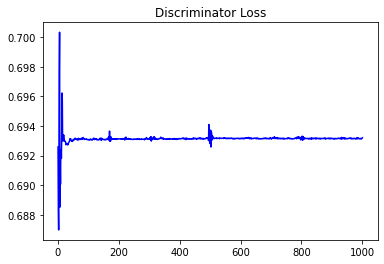

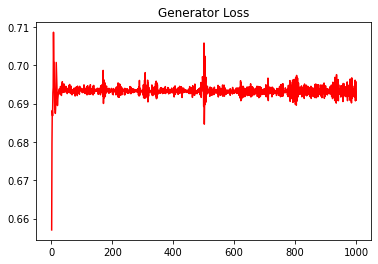

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.1366147939279752


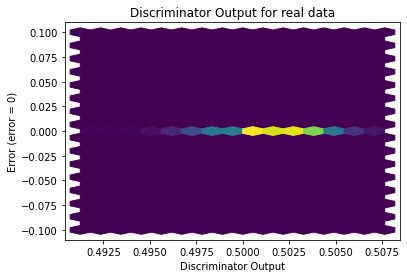

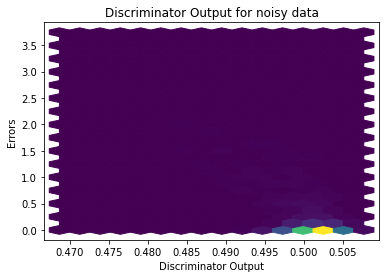

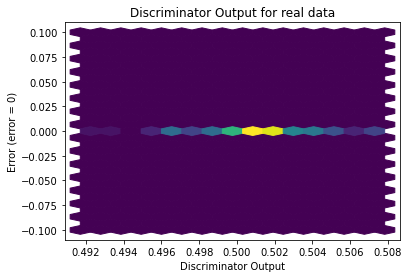

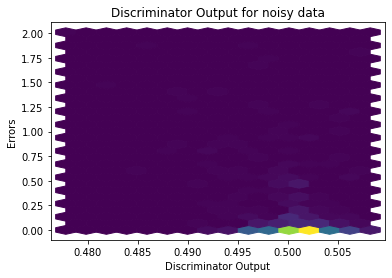

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


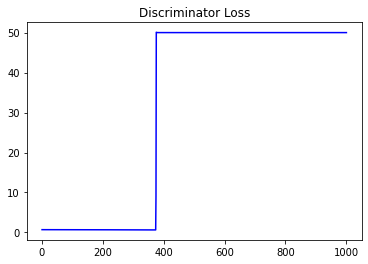

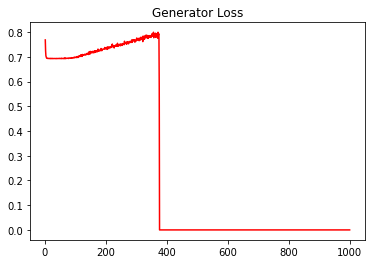

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
657.3223441881404


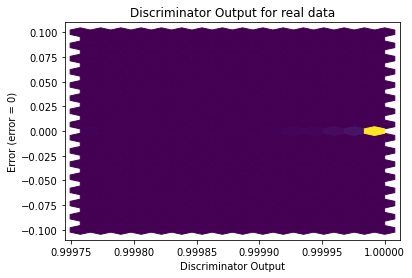

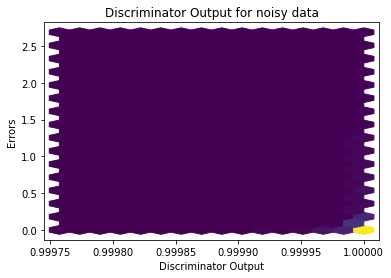

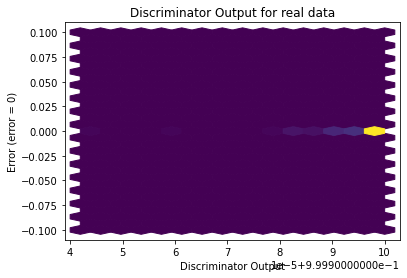

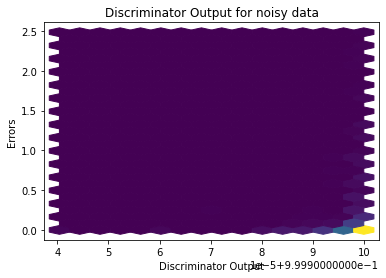

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0479]], requires_grad=True)
